<a href="https://colab.research.google.com/github/HSE-LAMBDA/MLDM-2022/blob/master/04-regularization/Regularization_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import Ridge, Lasso

# Task 1 (3 points + 2 points for a well organized and easy to read plot + 1 point for the short comment)

Consider the following toy dataset with pairs of correlated features:

In [4]:
def gen_data(N, correlation=0.5):
  # start from 4 independent features:
  X = np.random.uniform(-1., 1., size=(N, 4))

  y = X @ [2.3, -4.7, -1.7, 3.2] # true dependence

  # add correlations, so that X[:,0] correlates with X[:,2] and
  # X[:,1] correlates with X[:,3]:
  X[:,2:] = correlation * X[:,:2] + (1 - correlation) * X[:,2:]

  # add some noise to the targets
  y += np.random.normal(size=y.shape)

  return X, y

Fit this dataset with Ridge and Lasso (**without the bias term!**), for different correlation levels and various regularization powers.

Separately for Ridge and Lasso, and separately for different correlation levels, plot the fitted parameter values as a function of regularization power (x-axis in log scale). Make sure to make some color and pattern coding to make it clear which parameters correspond to correlating groups of features, e.g.:
```python
# Same color (red), different patterns (solid vs dashed) for features 0 and 2
plt.plot(alpha_values, param_0, color='red', label='0')
plt.plot(alpha_values, param_2, '--', color='red', label='2')

# Same color (blue), different patterns (solid vs dashed) for features 1 and 3
plt.plot(alpha_values, param_1, color='blue', label='1')
plt.plot(alpha_values, param_3, '--', color='blue', label='3')
```
Please also add legends, axis labels and/or titles to be able to understand what's shown on this or that plot.

What do you observe? How regularization affects the two kinds of models for different correlation levels? Write a short comment.

  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 100/100 [00:00<00:00, 1750.43it/s]


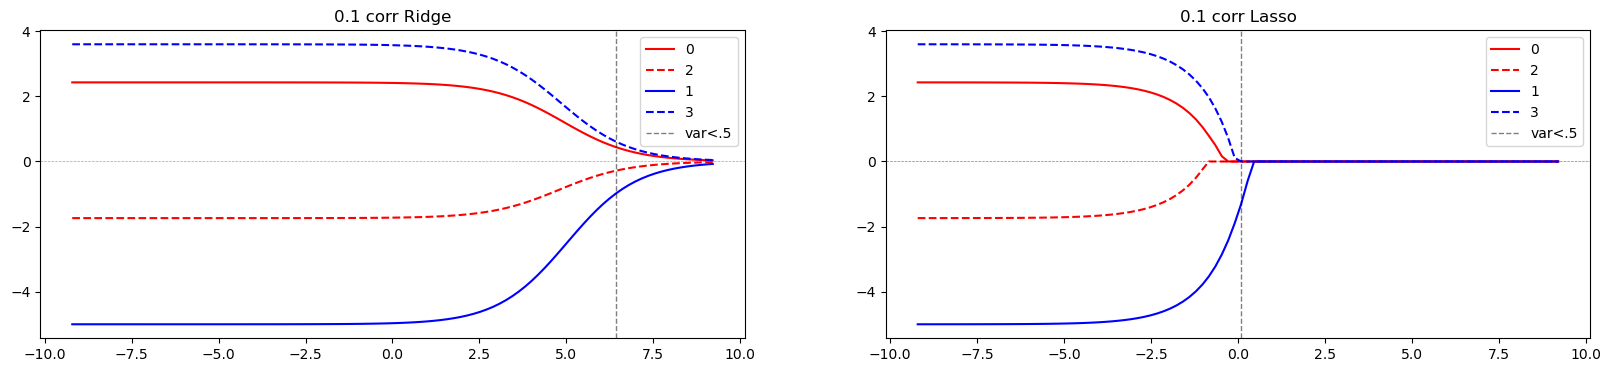

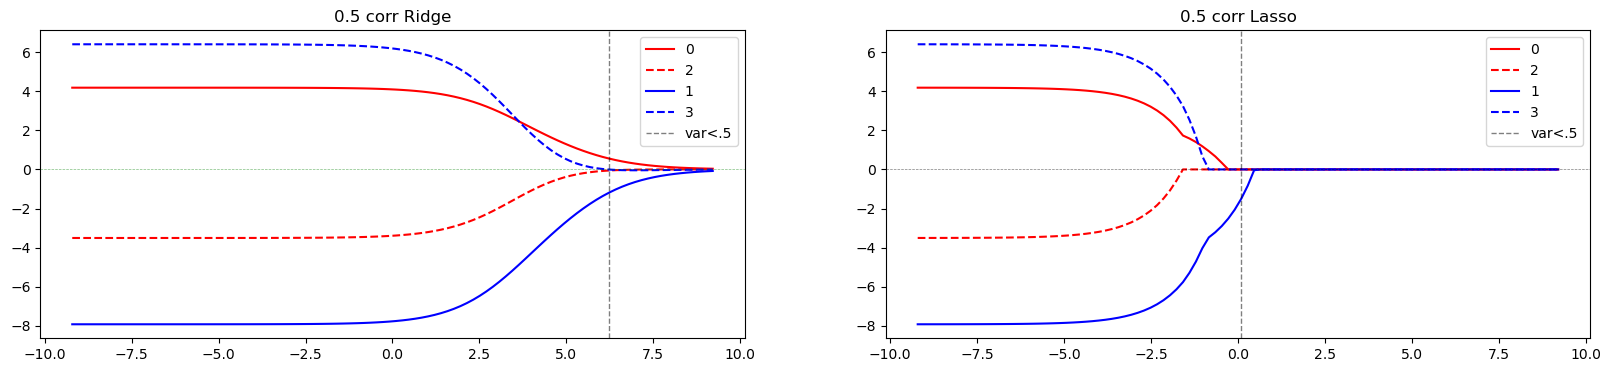

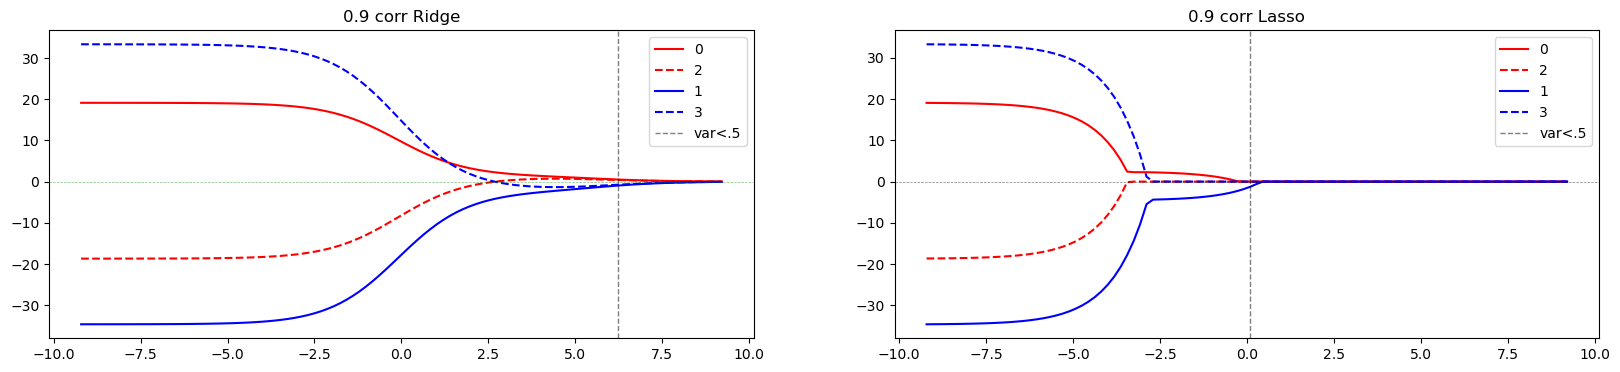

In [146]:
from tqdm import tqdm

for correlation in [0.1, 0.5, 0.9]:
  # dataset to fit (no need to split into train/test in this task):
  X, y = gen_data(500, correlation)

  # regularization powers:
  alpha_values = np.logspace(-4, 4, 100, base=10)

  # lists to collect models' parameters:
  params_ridge = []
  params_lasso = []

  for alpha in tqdm(alpha_values):
    ridge = Ridge(fit_intercept=False, alpha=alpha)
    lasso = Lasso(fit_intercept=False, alpha=alpha)
    ridge.fit(X,y)
    lasso.fit(X,y)
    params_ridge.append(ridge.coef_)
    params_lasso.append(lasso.coef_)
  
  min_x_ridge = np.where(np.var(params_ridge, axis=1)<.5)[0][0] #variance for ridge < .5, just mine thresh
  min_x_lasso = np.where(np.var(params_lasso, axis=1)<.5)[0][0]

  xr = np.log(alpha_values[min_x_ridge])
  xl = np.log(alpha_values[min_x_lasso])


  # plotting for ridge
  fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,4))
  ax1.plot(np.log(alpha_values), list(zip(*params_ridge))[0], color='red', label='0')
  ax1.plot(np.log(alpha_values), list(zip(*params_ridge))[2], '--', color='red', label='2')
  ax1.plot(np.log(alpha_values), list(zip(*params_ridge))[1], color='blue', label='1')
  ax1.plot(np.log(alpha_values), list(zip(*params_ridge))[3], '--', color='blue', label='3')
  ax1.set_title(f'{correlation} corr Ridge')
  
  # plotting for lasso
  ax2.plot(np.log(alpha_values), list(zip(*params_lasso))[0], color='red', label='0')
  ax2.plot(np.log(alpha_values), list(zip(*params_lasso))[2], '--', color='red', label='2')
  ax2.plot(np.log(alpha_values), list(zip(*params_lasso))[1], color='blue', label='1')
  ax2.plot(np.log(alpha_values), list(zip(*params_lasso))[3], '--', color='blue', label='3')
  ax2.set_title(f'{correlation} corr Lasso')

  # lines with starting 
  ax1.axvline(x=xr, color='black', linestyle='--', alpha=.5, linewidth=1, label='var<.5')
  ax2.axvline(x=xl, color='black', linestyle='--', alpha=.5, linewidth=1, label='var<.5')
  ax1.axhline(y=0, color='green', linestyle='--', alpha=.5, linewidth=.5)
  ax2.axhline(y=0, color='black', linestyle='--', alpha=.5, linewidth=.5)
  
  
  ax1.legend()
  ax2.legend()


  



## Conclusion

1. First thing, that eye catches is that the more correlation between features the more extreme coefficients are in low alpha, that means that high correlation between features leads to overfitting
2. Ridge regularization is smoother than lasso regularization, and in my opinion has bigger window for fitting normal coefficients to regression. For example, if we check the x value on .1 correlation on ridge where variance became <.5 we will see, that we have space from 6 to 9 log scale points, that means that we have a lot of alpha values where our regularization will work with normal coefficients values. (Normal in this case is subject author opinion), whethere if we look at the same lasso graph, we will see that it minimized coefficients so fast and we have less space for choosing proper alphas.
3. Lasso makes coefficients to zeros while ridge not.
4. Threshold of lasso regression when we receive alreade close to zero coefficients is about 0 in log scale, it equals 1 in int alpha scale, while ridge starts to work in significantly bigger coefficients

So, if we want all our features to be in the model and we want to have more space for choosing the alpha, we use L2, otherwise l1. L1 even in really small alphas allows us to exclude features from the model, that is why it is helpful for dimention and complexity reduction of the models, however, we have to be accurate in choosing l1's alpha because we can loose a lot of information even in defalut alpha= 1.